<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/opencv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upload cats.jpg<br>
upload cat images from cat-face-detector in downloads<br>

upload haarcascade_frontalcatface.xml

In [ ]:
!wget http://alereimondo.no-ip.org/OpenCV/uploads/34/frontalFace10.zip
!wget https://pns2019.github.io/images/Lenna.png
!unzip  frontalFace10.zip

--2020-06-22 23:53:47--  http://alereimondo.no-ip.org/OpenCV/uploads/34/frontalFace10.zip
Resolving alereimondo.no-ip.org (alereimondo.no-ip.org)... 181.167.169.22
Connecting to alereimondo.no-ip.org (alereimondo.no-ip.org)|181.167.169.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 763850 (746K) [application/zip]
Saving to: ‘frontalFace10.zip.1’

frontalFace10.zip.1 100%[===================>] 745.95K   305KB/s    in 2.4s    

2020-06-22 23:53:50 (305 KB/s) - ‘frontalFace10.zip.1’ saved [763850/763850]

--2020-06-22 23:53:50--  https://pns2019.github.io/images/Lenna.png
Resolving pns2019.github.io (pns2019.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to pns2019.github.io (pns2019.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png’

Lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.07s   

2020-06-22 23:53

In [ ]:
!pip install git+git://github.com/PnS2019/pnslib.git

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-c7hlcxgw
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-c7hlcxgw
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489618 sha256=88ec1b4d518e3a6eaa7ba0bc1d07d306190264474050dbeb51ffca686ae10df4
  Stored in directory: /tmp/pip-ephem-wheel-cache-yfmaq460/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib


In [ ]:
# import the necessary packages
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from pnslib import utils
import matplotlib.pyplot as plt

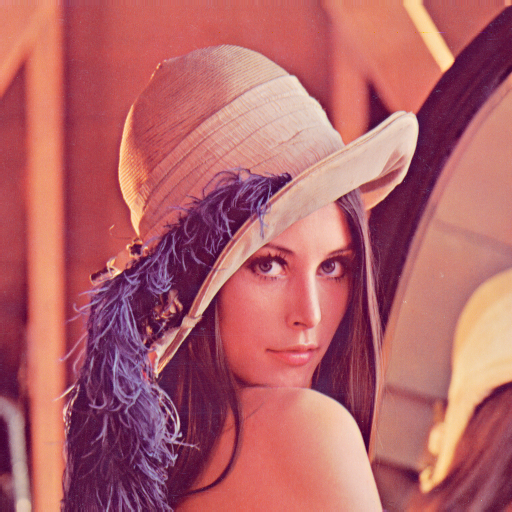

In [ ]:
# read image
img = cv2.imread("Lenna.png")
cv2_imshow(img)

In [ ]:
# load face cascade and eye cascade
face_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_eye.xml'))

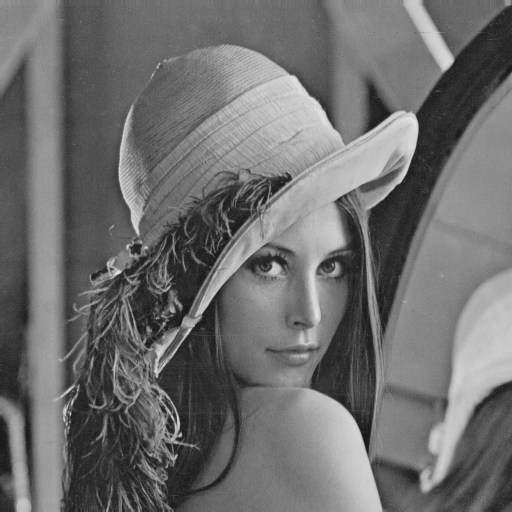

In [ ]:
# search face
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

A scaleFactor  of our image pyramid used when detecting cat faces. A larger scale factor will increase the speed of the detector, but could harm our true-positive detection accuracy. Conversely, a smaller scale will slow down the detection process, but increase true-positive detections.

The minNeighbors  parameter controls the minimum number of detected bounding boxes in a given area for the region to be considered a “cat face”. This parameter is very helpful in pruning false-positive detections.

the minSize  parameter is pretty self-explanatory. This value ensures that each detected bounding box is at least width x height pixels (in this case, 75 x 75).

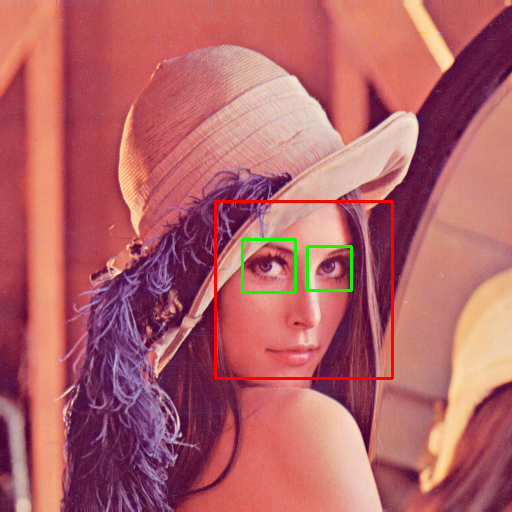

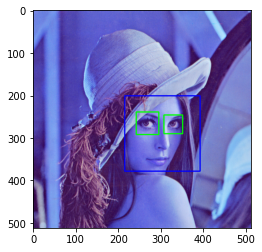

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

plt.figure()
plt.imshow(img)
plt.show()

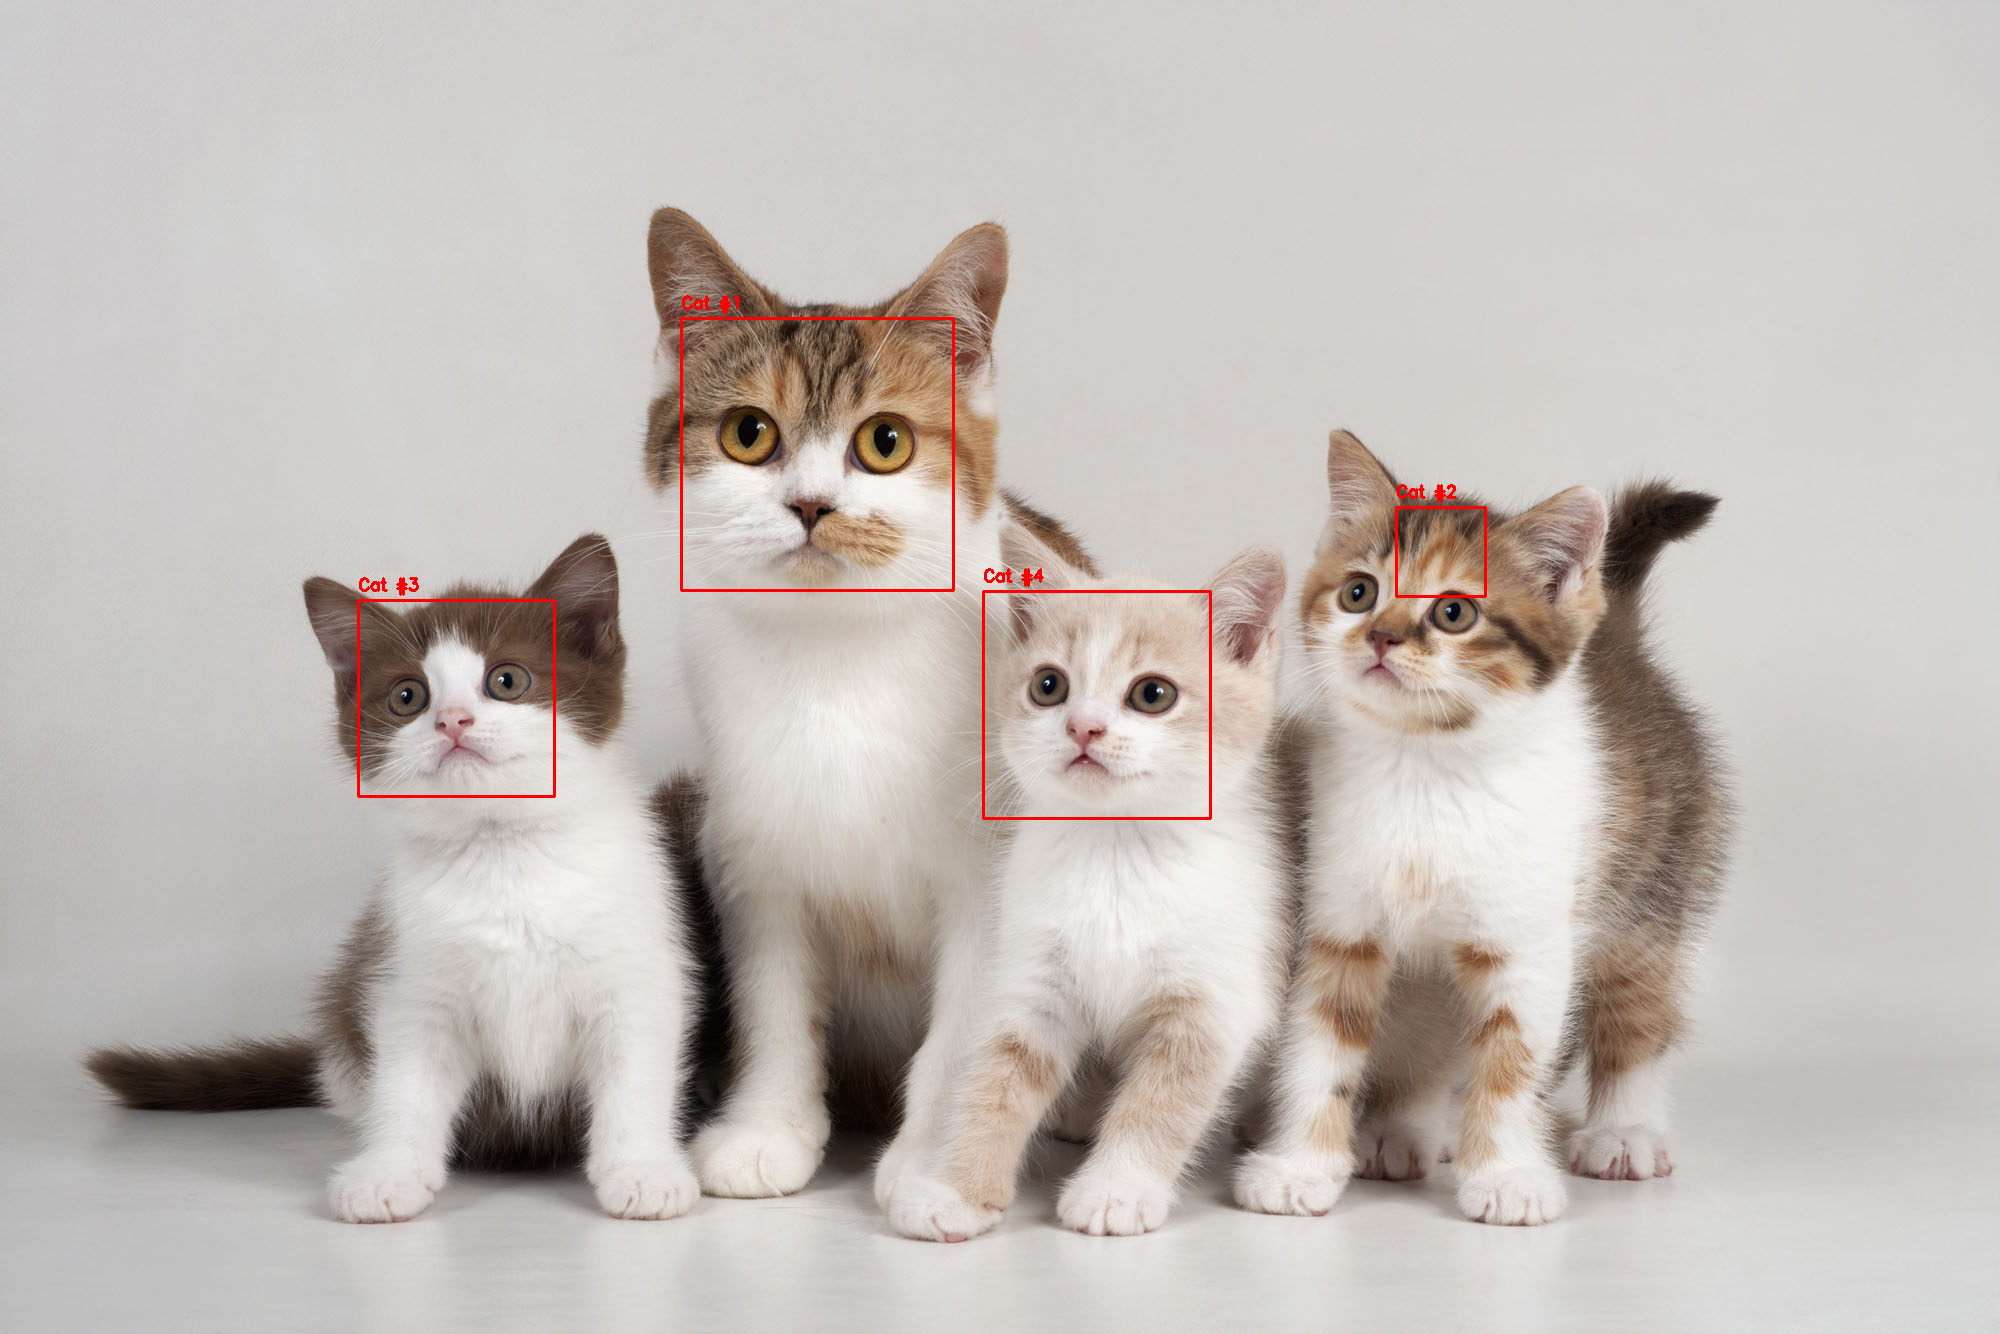

In [ ]:
# USAGE
# python cat_detector.py --image images/cat_01.jpg

# import the necessary packages
import cv2

# load the input image and convert it to grayscale
image = cv2.imread("cats.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# load the cat detector Haar cascade, then detect cat faces
# in the input image
detector = cv2.CascadeClassifier("haarcascade_frontalcatface.xml")
rects = detector.detectMultiScale(gray, scaleFactor=1.3,
	minNeighbors=8, minSize=(75, 75))

# loop over the cat faces and draw a rectangle surrounding each
for (i, (x, y, w, h)) in enumerate(rects):
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.putText(image, "Cat #{}".format(i + 1), (x, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)

# show the detected cat faces
cv2_imshow(image)

